## EXPLORATORY DATA ANALYSIS OF FORBES 2017 LIST OF WORLD'S BILLIONAIRES

### Import Libraries necessary libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set()
import warnings
warnings.filterwarnings('ignore') 


In [2]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True

### Get an overview of what the dataset entails

In [3]:
f_b = pd.read_csv('Forbes Worlds Billionaires.csv')

In [4]:
f_b.head(3)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Headquarters,State,Net Worth,Title
0,1.0,Jeff Bezos,54.0,Amazon,Technology,Male,North America,United States,WA,Washington,112.0,"CEO and Founder, Amazon.com"
1,2.0,Bill Gates,62.0,Microsoft,Technology,Male,North America,United States,WA,Washington,90.0,"Cofounder, Bill & Melinda Gates Foundation"
2,3.0,Warren Buffett,87.0,Berkshire Hathaway,Finance and Investments,Male,North America,United States,NE,Nebraska,84.0,"CEO, Berkshire Hathaway"


In [5]:
f_b.tail(2)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Headquarters,State,Net Worth,Title
2255,NaN,Zhang Zhongneng & family,54.0,aluminum,Manufacturing,Male,Asia,China,NaN,Guangdong,NaN,NaN
2256,NaN,Zhou Yifeng & family,39.0,liquefied petroleum gas,Energy,Female,Asia,China,NaN,Jiangsu,NaN,NaN


In [6]:
f_b.shape

(2257, 12)

In [7]:
f_b.dtypes

Rank            float64
Name             object
Age             float64
Source           object
Industry         object
Gender           object
Continent        object
Country          object
Headquarters     object
State            object
Net Worth       float64
Title            object
dtype: object

## Work on missing values

In [91]:
f_b.isna().sum()  # shows the amount of missing values in each column

Rank              49
Name               0
Age               72
Source             0
Industry           0
Gender            17
Continent         27
Country            0
Headquarters    1663
State           1651
Net Worth         49
Title           1910
dtype: int64

### Get the missing values of each column in percentages

In [9]:
(f_b.isna().sum()/len(f_b))*100

Rank             2.171023
Name             0.000000
Age              3.190075
Source           0.000000
Industry         0.000000
Gender           0.753212
Continent        1.196278
Country          0.000000
Headquarters    73.681879
State           73.150199
Net Worth        2.171023
Title           84.625609
dtype: float64

### The above analysis shows more than half of the data in column : Title, State and Headquarters are missing. For this reason I would be dropping the columns as the missing dataset is too big to fill in

In [10]:
f_b1 = f_b.drop(columns=['Title','State','Headquarters'])

In [11]:
f_b1.shape  # this has dropped 3 columns 

(2257, 9)

### Get the first 100  ranks, as that is what i would work on later, but would like to do some data cleaning on the entire datase

In [92]:
f_b100 = f_b1[:100]  # Get the first 100 rows

In [93]:
f_b100.shape

(100, 9)

### check for any missing values in f_b100

In [14]:
f_b100.isna().sum()

Rank         0
Name         0
Age          3
Source       0
Industry     0
Gender       1
Continent    0
Country      0
Net Worth    0
dtype: int64

In [15]:
f_b100[f_b100.isna().any(axis=1)]

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
26,27.0,Beate Heister & Karl Albrecht Jr.,66.0,supermarkets,Fashion & Retail,NaN,Europe,Germany,29.8
54,55.0,Hinduja family,NaN,diversified,Diversified,Male,Europe,United Kingdom,19.5
76,77.0,Thomas & Raymond Kwok,NaN,real estate,Real Estate,Male,Asia,Hong Kong,16.5
89,88.0,David & Simon Reuben,NaN,"investments, real estate",Real Estate,Male,Europe,United Kingdom,15.5


### change the dtype of Rank and  Age  to integer, but since Age column has NAN, the conversion will throw an error. Thus the need to manipulate the NAN in Age column. Will use the mean value of age in the coresponding continent and use the most frequent gender in the corresponding continent

### Select only rows with continent == 'Europe'

In [94]:
f_b100EU = f_b100[f_b100['Continent'] == 'Europe']

In [95]:
f_b100EU['Age'].describe().to_frame()

,Age
count,23.000000
mean,68.130435
std,12.454661
min,47.000000
25%,59.000000
50%,68.000000
75%,79.000000
max,92.000000


In [96]:
f_b100EU['Gender'].describe().to_frame()

,Gender
count,23
unique,2
top,Male
freq,20


In [19]:
f_b100EU['Gender'].unique().tolist()

['Male', 'Female', nan]

In [97]:
f_b100EU['Gender'] = f_b100EU['Gender'].fillna('Male') # using male since it is the most frequent

In [98]:
f_b100EU['Age'] = f_b100EU['Age'].fillna(68.0) #  I used the mean age

### Re-insert the subset into the f_b100 dataframe

In [99]:
f_b100[f_b100['Continent'] == 'Europe'] = f_b100EU

### Select only rows with continent == 'Asia'

In [100]:
f_b100AS = f_b100[f_b100['Continent'] == 'Asia']
f_b100AS.head(3)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
16,17.0,Ma Huateng,46.0,internet media,Technology,Male,Asia,China,45.3
18,19.0,Mukesh Ambani,60.0,"petrochemicals, oil & gas",Energy,Male,Asia,India,40.1
19,20.0,Jack Ma,53.0,e-commerce,Technology,Male,Asia,China,39.0


In [101]:
f_b100AS['Age'].describe().to_frame()

,Age
count,38.000000
mean,65.473684
std,14.371023
min,36.000000
25%,54.750000
50%,65.000000
75%,74.500000
max,94.000000


In [103]:
f_b100AS['Age'] = f_b100AS['Age'].fillna(65) # i used the mean age
f_b100AS.head(3)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
16,17.0,Ma Huateng,46.0,internet media,Technology,Male,Asia,China,45.3
18,19.0,Mukesh Ambani,60.0,"petrochemicals, oil & gas",Energy,Male,Asia,India,40.1
19,20.0,Jack Ma,53.0,e-commerce,Technology,Male,Asia,China,39.0


In [104]:
f_b100AS['Gender'].describe().to_frame()

,Gender
count,38
unique,2
top,Male
freq,37


### Re-insert back into the f_b100 dataframe

In [105]:
f_b100[f_b100['Continent'] == 'Asia'] = f_b100AS

### check to see if all nan has been filled out

In [106]:
f_b100.isna().sum()

Rank         0
Name         0
Age          0
Source       0
Industry     0
Gender       0
Continent    0
Country      0
Net Worth    0
dtype: int64

### The cell above shows there is no more missing value / nan in the f_b100 dataframe, so now change the dtype of Rank and Age to int

In [108]:
f_b100[['Rank','Age']] = f_b100[['Rank','Age']].astype(int)

In [109]:
f_b100.head(2)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
0,1,Jeff Bezos,54,Amazon,Technology,Male,North America,United States,112.0
1,2,Bill Gates,62,Microsoft,Technology,Male,North America,United States,90.0


### Check for unique values and duplicate values

In [110]:
f_b100.duplicated().value_counts()        # using duplicated() on whole df does not give a true
                                          #picture of duplicated values in each col

False    100
dtype: int64

In [111]:
f_b100['Rank'].nunique()  # there are only 78 unique values instead of 100, meaning some people share the same rank

78

In [33]:
f_b100['Name'].nunique()  # there are 100 unique names, so no name is repeated

100

In [37]:
r = f_b100[['Rank','Net Worth']].duplicated()


In [38]:
r.value_counts()# there are about 22 duplicated value each for rank and net worth

False    78
True     22
dtype: int64

In [112]:
f_b100[r].head(3) # this shows the rank and net worth that areduplicated

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
8,8,David Koch,77,Koch Industries,Diversified,Male,North America,United States,60.0
24,24,Lee Shau Kee,90,real estate,Real Estate,Male,Asia,Hong Kong,30.3
32,32,David Thomson,60,media,Media & Entertainment,Male,North America,Canada,25.0


In [40]:
f_b100[7:25]

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
7,8,Charles Koch,82,Koch Industries,Diversified,Male,North America,United States,60.0
8,8,David Koch,77,Koch Industries,Diversified,Male,North America,United States,60.0
9,10,Larry Ellison,73,software,Technology,Male,North America,United States,58.5
10,11,Michael Bloomberg,76,Bloomberg LP,Media & Entertainment,Male,North America,United States,50.0
11,12,Larry Page,44,Google,Technology,Male,North America,United States,48.8
12,13,Sergey Brin,44,Google,Technology,Male,North America,United States,47.5
13,14,Jim Walton,69,Walmart,Fashion & Retail,Male,North America,United States,46.4
14,15,S. Robson Walton,73,Walmart,Fashion & Retail,Male,North America,United States,46.2
15,16,Alice Walton,68,Walmart,Fashion & Retail,Female,North America,United States,46.0
16,17,Ma Huateng,46,internet media,Technology,Male,Asia,China,45.3


In [114]:
f_b100.groupby(['Gender','Continent']).describe()#.T #count()

Rank                                               \
                     count        mean        std    min     25%    50%   
Gender Continent                                                          
Female Asia            1.0   43.000000        NaN   43.0   43.00   43.0   
       Europe          3.0   45.333333  35.907288   18.0   25.00   32.0   
       North America   4.0   47.750000  29.124732   16.0   29.50   46.0   
       Oceania         1.0   69.000000        NaN   69.0   69.00   69.0   
       South America   1.0   80.000000        NaN   80.0   80.00   80.0   
Male   Africa          1.0  100.000000        NaN  100.0  100.00  100.0   
       Asia           37.0   62.486486  24.814447   17.0   50.00   64.0   
       Europe         20.0   51.500000  27.335152    4.0   35.50   45.5   
       North America  30.0   33.300000  27.860676    1.0   10.25   25.0   
       South America   2.0   32.500000   4.949747   29.0   30.75   32.5   

                                      Age             ...               \
                         75%    max count       mean  ...    75%   max   
Gender Continent                                      ...                
Female Asia            43.00   43.0   1.0  36.000000  ...  36.00  36.0   
       Europe          59.00   86.0   3.0  60.666667  ...  63.50  64.0   
       North America   64.25   83.0   4.0  64.000000  ...  70.50  78.0   
       Oceania         69.00   69.0   1.0  64.000000  ...  64.00  64.0   
       South America   80.00   80.0   1.0  75.000000  ...  75.00  75.0   
Male   Africa         100.00  100.0   1.0  60.000000  ...  60.00  60.0   
       Asia            82.00   99.0  37.0  66.270270  ...  75.00  94.0   
       Europe          74.25   97.0  20.0  69.250000  ...  80.25  92.0   
       North America   51.00   94.0  30.0  67.033333  ...  79.75  87.0   
       South America   34.25   36.0   2.0  78.500000  ...  78.75  79.0   

                     Net Worth                                             \
                         count       mean        std   min     25%    50%   
Gender Continent                                                            
Female Asia                1.0  21.900000        NaN  21.9  21.900  21.90   
       Europe              3.0  27.666667  13.400498  15.8  20.400  25.00   
       North America       4.0  26.075000  13.657568  15.9  18.075  21.20   
       Oceania             1.0  17.400000        NaN  17.4  17.400  17.40   
       South America       1.0  16.300000        NaN  16.3  16.300  16.30   
Male   Africa              1.0  14.100000        NaN  14.1  14.100  14.10   
       Asia               37.0  20.832432   7.887862  14.4  16.000  18.00   
       Europe             20.0  25.425000  16.122128  14.7  16.700  21.05   
       North America      30.0  40.680000  25.529191  15.0  20.050  34.00   
       South America       2.0  25.450000   2.757716  23.5  24.475  25.45   

                                     
                         75%    max  
Gender Continent                     
Female Asia           21.900   21.9  
       Europe         33.600   42.2  
       North America  29.200   46.0  
       Oceania        17.400   17.4  
       South America  16.300   16.3  
Male   Africa         14.100   14.1  
       Asia           20.100   45.3  
       Europe         23.575   72.0  
       North America  56.375  112.0  
       South America  26.425   27.4  

[10 rows x 24 columns]

In [115]:
f_b100.groupby(['Gender','Continent','Country']).agg({'Age':['min','max'],'Net Worth':['min','max','sum'], 'Gender': ['count']})

Age     Net Worth                Gender
                                    min max       min    max     sum  count
Gender Continent     Country                                               
Female Asia          China           36  36      21.9   21.9    21.9      1
       Europe        France          64  64      42.2   42.2    42.2      1
                     Germany         55  55      25.0   25.0    25.0      1
                     Netherlands     63  63      15.8   15.8    15.8      1
       North America United States   54  78      15.9   46.0   104.3      4
       Oceania       Australia       64  64      17.4   17.4    17.4      1
       South America Chile           75  75      16.3   16.3    16.3      1
Male   Africa        Nigeria         60  60      14.1   14.1    14.1      1
       Asia          China           46  75      15.3   45.3   231.2      9
                     Hong Kong       65  90      16.5   34.9   118.5      5
                     India           60  72      14.6   40.1    92.0      4
                     Indonesia       77  78      16.7   17.4    34.1      2
                     Japan           60  72      17.5   22.7    59.7      3
                     Malaysia        94  94      14.8   14.8    14.8      1
                     Philippines     93  93      20.0   20.0    20.0      1
                     Russia          46  67      14.4   19.1   149.1      9
                     South Korea     76  76      18.6   18.6    18.6      1
                     Thailand        73  78      14.9   17.9    32.8      2
       Europe        Austria         73  73      23.0   23.0    23.0      1
                     Czech Republic  53  53      15.5   15.5    15.5      1
                     France          47  92      14.7   72.0   136.3      4
                     Germany         51  80      15.3   29.8   133.5      6
                     Ireland         88  88      17.8   17.8    17.8      1
                     Italy           53  82      21.2   23.0    44.2      2
                     Spain           81  81      70.0   70.0    70.0      1
                     Sweden          70  70      16.8   16.8    16.8      1
                     United Kingdom  65  68      15.5   19.5    51.4      3
       North America Canada          60  60      25.0   25.0    25.0      1
                     Mexico          64  78      17.3   67.1    84.4      2
                     United States   31  87      15.0  112.0  1111.0     27
       South America Brazil          78  79      23.5   27.4    50.9      2

* From the output above, there are no female billionaire from Africa in the top 100, while there are no male billionaire from Oceania.
* Nigeria(Africa) is the only country that produced a male billionaire from Africa
* China is the only country to have female billionaire from Asia
* United States has the highest count of billionaire for both genders{f:4,m:27} 

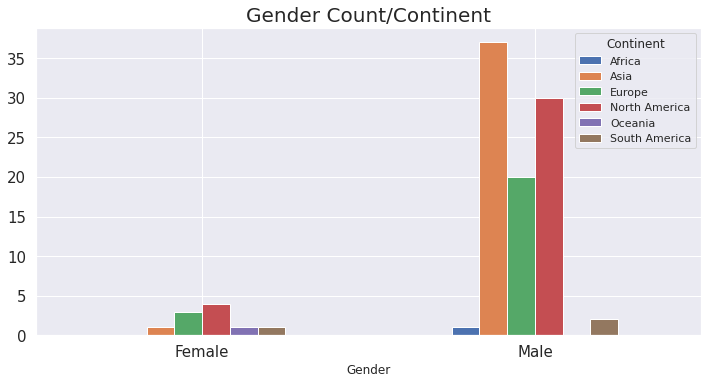

In [116]:
f_b100.groupby(['Gender','Continent']).agg({'Gender':'count'}).unstack().plot(kind='bar',y='Gender', rot=0,
                                                                             fontsize=15)
plt.title('Gender Count/Continent', fontsize=20);
#plt.xlabel('Gender')
#plt.ylabel('Count');

The graph above shows Asia has the highest number of billionaires and also the highest male billionaires within the first 100 billionaires

In [122]:
#f_b100.groupby('Continent',as_index=False, sort=False)['Net Worth'].sum().sort_values(by='Net Worth', ascending=False)

In [121]:
df = f_b100.groupby('Continent',as_index = False,sort=False).agg({'Net Worth':'sum'}).sort_values(by='Net Worth', ascending=False)#.plot(kind='bar', rot=45)
fig = px.bar(data_frame= df, x='Continent',y='Net Worth', title='Sum of Net Worth/Continent')
fig.show()

The graph above shows Asia has the highest number of billionaires and also the highest male billionaires within the first 100 billionaires

Even thou Asia has the highest number of billionaires, the total net worth of its billionaires is almost half to that of North America. Let's probe further and see which country is a major contributor in North America

In [131]:
f_b100[f_b100['Continent']== 'North America']['Country'].value_counts().to_frame()

,Country
United States,31
Mexico,2
Canada,1


This shows USA is the highest contributor of billionaires in North America

In [123]:
#f_b100.groupby(['Gender','Continent']).agg({'Gender':'count'}).unstack().plot(kind='bar',y='Gender',stacked=True, rot=0);

In [73]:
df2 = f_b100.groupby(['Gender','Country'],as_index=False)['Net Worth'].sum()
fig = px.bar(data_frame= df2, x='Gender',y='Net Worth', color='Country', barmode='group',title='Sum of Net Worth/Gender/Country')
fig.show()

From the plot above, USA (North America) has the highest networth for both genders eevn thou Asia has the highest number of billionaires from both Genders, , is there a reason for this?

With USA having the highest networth, let's take a look at the industry contributing majorly to this

In [83]:
f_b100USA = f_b100[f_b100['Country'] == 'United States']
f_b100USA.head(3)

,Rank,Name,Age,Source,Industry,Gender,Continent,Country,Net Worth
0,1,Jeff Bezos,54,Amazon,Technology,Male,North America,United States,112.0
1,2,Bill Gates,62,Microsoft,Technology,Male,North America,United States,90.0
2,3,Warren Buffett,87,Berkshire Hathaway,Finance and Investments,Male,North America,United States,84.0


In [84]:
Sect = f_b100USA['Industry'].value_counts().to_frame('Count').rename_axis('Industry').reset_index()#.plot(kind='pie');
Sect

,Industry,Count
0,Technology,9
1,Finance and Investments,6
2,Fashion & Retail,5
3,Diversified,3
4,Media & Entertainment,2
5,Food and Beverage,2
6,Gambling & Casinos,1
7,Automotive,1
8,Philanthropy/NGO,1
9,Real Estate,1


In [89]:
fig = px.pie(Sect, values='Count', names='Industry',title= 'Distribution of USA economy by Industry')
fig.update_traces(textposition='inside', textfont_size=14)
fig.show()

From  the pie chart above we can see the sector having the most billionaires, which is the Tech sector, surprisingly the health sector has no billionaire within it, could there be a reason for this ?.